<a href="https://colab.research.google.com/github/Freaker99/domain-classifier/blob/main/Domain_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


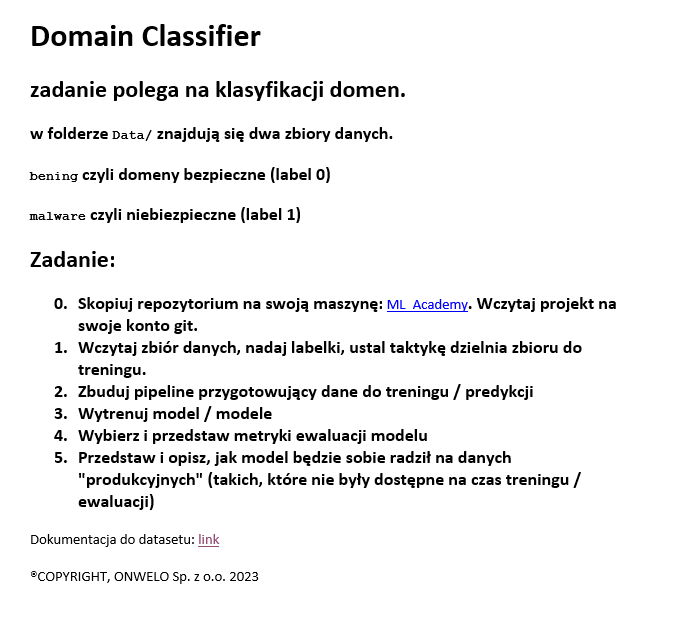


Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

##Data Collection and Processing

In [2]:
# loading csv data to a Pandas DataFrame
bening_data = pd.read_csv('/content/drive/My Drive/CSV_benign.csv')
malware_data = pd.read_csv('/content/drive/My Drive/CSV_malware.csv')

<ipython-input-2-b21ad4e4e40b>:2: DtypeWarning: Columns (9,10,12,13,17,18,20,21,24,25,27,28,36) have mixed types. Specify dtype option on import or set low_memory=False.
  bening_data = pd.read_csv('/content/drive/My Drive/CSV_benign.csv')


In [3]:
# print first 5 rows in the dataframe
bening_data.head()

,Country,ASN,TTL,IP,Domain,State,Registrant_Name,Country.1,Creation_Date_Time,hex_32,...,puny_coded,typos,oc_8,3gram,char_distribution,2gram,Registrar,sld,Name_Server_Count,Page_Rank
0,US,15169.0,46,172.217.1.174,b'google.com.',CA,NaN,US,1997-09-15 04:00:00,0,...,0,"[('google.com', 100), ('google.com.br', 95)]",0,"['goo', 'oog', 'ogl', 'gle']","defaultdict(<class 'int'>, {'e': 1, 'o': 2, 'g...","['go', 'oo', 'og', 'gl', 'le']",MarkMonitor inc.,google,8.0,-1.0
1,NaN,NaN,299,NaN,b'google.com.',CA,NaN,US,1997-09-15 04:00:00,0,...,0,"[('google.com', 100), ('google.com.br', 95)]",0,"['goo', 'oog', 'ogl', 'gle']","defaultdict(<class 'int'>, {'e': 1, 'o': 2, 'g...","['go', 'oo', 'og', 'gl', 'le']",MarkMonitor inc.,google,8.0,-1.0
2,NaN,NaN,38,NaN,b'www.google.com.',NaN,NaN,NaN,1997-09-15 04:00:00,0,...,0,"[('google.com', 100), ('google.com.br', 95)]",0,"['goo', 'oog', 'ogl', 'gle']","defaultdict(<class 'int'>, {'e': 1, 'o': 2, 'w...","['go', 'oo', 'og', 'gl', 'le']",MarkMonitor Inc.,google,4.0,-1.0
3,US,15169.0,299,172.217.164.228,b'www.google.com.',NaN,NaN,NaN,NaN,0,...,0,"[('google.com', 100), ('google.com.br', 95)]",0,"['goo', 'oog', 'ogl', 'gle']","defaultdict(<class 'int'>, {'e': 1, 'o': 2, 'w...","['go', 'oo', 'og', 'gl', 'le']",NaN,google,NaN,NaN
4,NaN,NaN,96,NaN,b'facebook.com.',CA,NaN,US,1997-03-29 05:00:00,0,...,0,"[('facebook.com', 100), ('qq.com', 86)]",0,"['fac', 'ace', 'ceb', 'ebo', 'boo', 'ook']","defaultdict(<class 'int'>, {'e': 1, 'c': 1, 'o...","['fa', 'ac', 'ce', 'eb', 'bo', 'oo', 'ok']",RegistrarSafe LLC,facebook,4.0,-1.0


In [4]:
# print last 5 rows in the dataframe
bening_data.tail()

,Country,ASN,TTL,IP,Domain,State,Registrant_Name,Country.1,Creation_Date_Time,hex_32,...,puny_coded,typos,oc_8,3gram,char_distribution,2gram,Registrar,sld,Name_Server_Count,Page_Rank
494130,NaN,NaN,298,NaN,b'rossdawson.com.',New South Wales,NaN,AU,2006-02-05 02:21:21,0,...,0.0,"[('apple.com', 86), ('adobe.com', 86)]",0,"['ros', 'oss', 'ssd', 'sda', 'daw', 'aws', 'ws...","defaultdict(<class 'int'>, {'o': 2, 'r': 1, 'n...","['ro', 'os', 'ss', 'sd', 'da', 'aw', 'ws', 'so...",GoDaddy.com LLC,rossdawson,2.0,-1.0
494131,DE,8560.0,3599,217.160.0.178,b'weddingprime.de.',NaN,NaN,NaN,NaN,0,...,0.0,"[('google.de', 86), ('amazon.de', 86)]",0,"['wed', 'edd', 'ddi', 'din', 'ing', 'ngp', 'gp...","defaultdict(<class 'int'>, {'e': 2, 'i': 2, 'g...","['we', 'ed', 'dd', 'di', 'in', 'ng', 'gp', 'pr...",NaN,weddingprime,0.0,-1.0
494132,NaN,NaN,3599,NaN,b'weddingprime.de.',NaN,NaN,NaN,NaN,0,...,0.0,"[('google.de', 86), ('amazon.de', 86)]",0,"['wed', 'edd', 'ddi', 'din', 'ing', 'ngp', 'gp...","defaultdict(<class 'int'>, {'e': 2, 'i': 2, 'g...","['we', 'ed', 'dd', 'di', 'in', 'ng', 'gp', 'pr...",NaN,weddingprime,0.0,-1.0
494133,UA,24703.0,21599,195.128.17.206,b'vlasenko.net.',--,NaN,UA,2000-10-16 13:58:43,0,...,0.0,"[('php.net', 86), ('a8.net', 86)]",0,"['vla', 'las', 'ase', 'sen', 'enk', 'nko']","defaultdict(<class 'int'>, {'e': 1, 'k': 1, 'n...","['vl', 'la', 'as', 'se', 'en', 'nk', 'ko']",CSL Computer Service Langenbach GmbH d/b/a jok...,vlasenko,6.0,-1.0
494134,AU,24446.0,14399,202.47.4.14,b'drterrencescamp.com.au.',NaN,NaN,NaN,NaN,0,...,0.0,"[('facebook.com', 86), ('twitter.com', 86)]",0,"['drt', 'rte', 'ter', 'err', 'rre', 'ren', 'en...","defaultdict(<class 'int'>, {'t': 1, 'e': 3, 'p...","['dr', 'rt', 'te', 'er', 'rr', 're', 'en', 'nc...",NaN,drterrencescamp,0.0,-1.0


In [5]:
# print first 5 rows in the dataframe
malware_data.head()

,Country,ASN,TTL,IP,Domain,oc_8,longest_word,Domain_Name,dec_32,subdomain,...,len,typos,tld,shortened,Registrar,obfuscate_at_sign,Alexa_Rank,3gram,numeric_percentage,puny_coded
0,US,26347.0,14399,67.205.14.183,b'dicrophani.com.',0,hani,DICROPHANI.COM,0,0,...,11,"[('apple.com', 86), ('adobe.com', 86)]",com,-1.0,Name.com inc.,0,-1.0,"['dic', 'icr', 'cro', 'rop', 'oph', 'pha', 'ha...",0.000000,0
1,US,46606.0,14399,70.40.220.126,b'dionneg.com.',0,dio,DIONNEG.COM,0,0,...,8,"[('g.co', 90), ('qq.com', 86)]",com,-1.0,FastDomain Inc.,0,-1.0,"['dio', 'ion', 'onn', 'nne', 'neg']",0.000000,0
2,US,16509.0,3599,15.164.151.80,b'vipprojects.cn.',0,projects,vipprojects.cn,0,0,...,12,"[('4.cn', 86), ('360.cn', 86)]",cn,-1.0,杭州名商网络有限公司,0,-1.0,"['vip', 'ipp', 'ppr', 'pro', 'roj', 'oje', 'je...",0.000000,0
3,US,395954.0,599,23.110.187.67,b'hhj3.cn.',0,hh,hhj3.cn,0,0,...,5,"[('miitbeian.gov.cn', 86), ('miibeian.gov.cn',...",cn,-1.0,成都西维数码科技有限公司,0,-1.0,"['hhj', 'hj3']",11.111111,0
4,US,395954.0,599,23.110.187.67,b'hhj3.cn.',0,hh,hhj3.cn,0,0,...,5,"[('miitbeian.gov.cn', 86), ('miibeian.gov.cn',...",cn,-1.0,成都西维数码科技有限公司,0,-1.0,"['hhj', 'hj3']",11.111111,0


In [6]:
# print last 5 rows of the dataframe
malware_data.tail()

,Country,ASN,TTL,IP,Domain,oc_8,longest_word,Domain_Name,dec_32,subdomain,...,len,typos,tld,shortened,Registrar,obfuscate_at_sign,Alexa_Rank,3gram,numeric_percentage,puny_coded
4994,DE,24940.0,14399,148.251.70.130,b'naveenmechanical.com.',0,mechanical,NaN,0,0,...,17,"[('facebook.com', 86), ('twitter.com', 86)]",com,-1.0,NaN,0,NaN,"['nav', 'ave', 'vee', 'een', 'enm', 'nme', 'me...",0.000000,0
4995,NL,204915.0,3599,145.14.145.85,b'onlinefrepdfviewer.000webhostapp.com.',0,p,000WEBHOSTAPP.COM,0,1,...,32,"[('twitter.com', 86), ('google.com', 86)]",com,-1.0,Hostinger UAB,0,3851.0,"['000', '00w', '0we', 'web', 'ebh', 'bho', 'ho...",7.894737,0
4996,NaN,NaN,3599,NaN,b'onlinefrepdfviewer.000webhostapp.com.',0,p,000WEBHOSTAPP.COM,0,1,...,32,"[('twitter.com', 86), ('google.com', 86)]",com,-1.0,Hostinger UAB,0,3851.0,"['000', '00w', '0we', 'web', 'ebh', 'bho', 'ho...",7.894737,0
4997,DE,8767.0,1799,62.245.182.18,b'stefanie-bolemant.de.',0,stefanie,stefanie-bolemant.de,0,0,...,18,"[('google.de', 86), ('e-recht24.de', 86)]",de,-1.0,NaN,0,-1.0,"['ste', 'tef', 'efa', 'fan', 'ani', 'nie', 'ie...",0.000000,0
4998,DE,8767.0,1799,62.245.182.48,b'web.asamnet.de.',0,mnet,asamnet.de,0,1,...,11,"[('gesetze-im-internet.de', 86), ('web.de', 86)]",de,-1.0,NaN,0,5004230.0,"['asa', 'sam', 'amn', 'mne', 'net']",0.000000,0


In [7]:
# number of rows and columns
bening_data.shape

(494135, 38)

In [8]:
# number of rows and columns
malware_data.shape

(4999, 38)

In [9]:
# add labels
bening_data['Label'] = 0
malware_data['Label'] = 1

In [10]:
# display all columns
pd.set_option('display.max_columns', None)

In [11]:
# print first 5 rows in the labeled dataframe
bening_data.head()

,Country,ASN,TTL,IP,Domain,State,Registrant_Name,Country.1,Creation_Date_Time,hex_32,hex_8,Domain_Name,Alexa_Rank,subdomain,Organization,len,longest_word,oc_32,shortened,1gram,obfuscate_at_sign,entropy,Domain_Age,tld,dec_8,dec_32,Emails,numeric_percentage,puny_coded,typos,oc_8,3gram,char_distribution,2gram,Registrar,sld,Name_Server_Count,Page_Rank,Label
0,US,15169.0,46,172.217.1.174,b'google.com.',CA,NaN,US,1997-09-15 04:00:00,0,0,"['GOOGLE.COM', 'google.com']",1.0,0,Google LLC,7,google,0.0,-1.0,"['g', 'o', 'o', 'g', 'l', 'e']",0.0,1.8348756474779464,8256 days 11:53:49.631067,com,0,0,"['abusecomplaints@markmonitor.com', 'whoisrequ...",0.0,0,"[('google.com', 100), ('google.com.br', 95)]",0,"['goo', 'oog', 'ogl', 'gle']","defaultdict(<class 'int'>, {'e': 1, 'o': 2, 'g...","['go', 'oo', 'og', 'gl', 'le']",MarkMonitor inc.,google,8.0,-1.0,0
1,NaN,NaN,299,NaN,b'google.com.',CA,NaN,US,1997-09-15 04:00:00,0,0,"['GOOGLE.COM', 'google.com']",1.0,0,Google LLC,7,google,0.0,-1.0,"['g', 'o', 'o', 'g', 'l', 'e']",0.0,1.8348756474779464,8256 days 11:53:50.479085,com,0,0,"['abusecomplaints@markmonitor.com', 'whoisrequ...",0.0,0,"[('google.com', 100), ('google.com.br', 95)]",0,"['goo', 'oog', 'ogl', 'gle']","defaultdict(<class 'int'>, {'e': 1, 'o': 2, 'g...","['go', 'oo', 'og', 'gl', 'le']",MarkMonitor inc.,google,8.0,-1.0,0
2,NaN,NaN,38,NaN,b'www.google.com.',NaN,NaN,NaN,1997-09-15 04:00:00,0,0,GOOGLE.COM,1.0,1,NaN,10,google,0.0,-1.0,"['g', 'o', 'o', 'g', 'l', 'e']",0.0,2.1142465351822795,8256 days 11:53:51.264191,com,0,0,abusecomplaints@markmonitor.com,0.0,0,"[('google.com', 100), ('google.com.br', 95)]",0,"['goo', 'oog', 'ogl', 'gle']","defaultdict(<class 'int'>, {'e': 1, 'o': 2, 'w...","['go', 'oo', 'og', 'gl', 'le']",MarkMonitor Inc.,google,4.0,-1.0,0
3,US,15169.0,299,172.217.164.228,b'www.google.com.',NaN,NaN,NaN,NaN,0,0,NaN,NaN,1,NaN,10,google,0.0,-1.0,"['g', 'o', 'o', 'g', 'l', 'e']",0.0,2.1142465351822795,NaN,com,0,0,NaN,0.0,0,"[('google.com', 100), ('google.com.br', 95)]",0,"['goo', 'oog', 'ogl', 'gle']","defaultdict(<class 'int'>, {'e': 1, 'o': 2, 'w...","['go', 'oo', 'og', 'gl', 'le']",NaN,google,NaN,NaN,0
4,NaN,NaN,96,NaN,b'facebook.com.',CA,NaN,US,1997-03-29 05:00:00,0,0,FACEBOOK.COM,4.0,0,Facebook inc.,9,facebook,0.0,-1.0,"['f', 'a', 'c', 'e', 'b', 'o', 'o', 'k']",0.0,2.5954888901709436,8426 days 10:53:52.505111,com,0,0,"['abusecomplaints@registrarsafe.com', 'domain@...",0.0,0,"[('facebook.com', 100), ('qq.com', 86)]",0,"['fac', 'ace', 'ceb', 'ebo', 'boo', 'ook']","defaultdict(<class 'int'>, {'e': 1, 'c': 1, 'o...","['fa', 'ac', 'ce', 'eb', 'bo', 'oo', 'ok']",RegistrarSafe LLC,facebook,4.0,-1.0,0


In [12]:
# print first 5 rows in the labeled dataframe
malware_data.head()

,Country,ASN,TTL,IP,Domain,oc_8,longest_word,Domain_Name,dec_32,subdomain,sld,Registrant_Name,hex_32,Domain_Age,entropy,Name_Server_Count,Emails,Creation_Date_Time,Organization,char_distribution,2gram,State,oc_32,Country.1,Page_Rank,hex_8,dec_8,1gram,len,typos,tld,shortened,Registrar,obfuscate_at_sign,Alexa_Rank,3gram,numeric_percentage,puny_coded,Label
0,US,26347.0,14399,67.205.14.183,b'dicrophani.com.',0,hani,DICROPHANI.COM,0,0,dicrophani,NaN,0,4277 days 21:07:56.450015,2.963120,6.0,"['abuse@name.com', 'roxics@gmail.com']",2008-08-04 04:20:05,Scape Films,"defaultdict(<class 'int'>, {'d': 1, 'n': 1, 'a...","['di', 'ic', 'cr', 'ro', 'op', 'ph', 'ha', 'an...",MI,0,US,-1.0,0,0,"['d', 'i', 'c', 'r', 'o', 'p', 'h', 'a', 'n', ...",11,"[('apple.com', 86), ('adobe.com', 86)]",com,-1.0,Name.com inc.,0,-1.0,"['dic', 'icr', 'cro', 'rop', 'oph', 'pha', 'ha...",0.000000,0,1
1,US,46606.0,14399,70.40.220.126,b'dionneg.com.',0,dio,DIONNEG.COM,0,0,dionneg,NaN,0,4596 days 7:06:33.492321,2.375000,2.0,"['support@bluehost.com', 'GORDONDN@HOTMAIL.COM...",2007-09-20 18:21:29,NaN,"defaultdict(<class 'int'>, {'d': 1, 'n': 2, 'g...","['di', 'io', 'on', 'nn', 'ne', 'eg']",CALIFORNIA,0,US,-1.0,0,0,"['d', 'i', 'o', 'n', 'n', 'e', 'g']",8,"[('g.co', 90), ('qq.com', 86)]",com,-1.0,FastDomain Inc.,0,-1.0,"['dio', 'ion', 'onn', 'nne', 'neg']",0.000000,0,1
2,US,16509.0,3599,15.164.151.80,b'vipprojects.cn.',0,projects,vipprojects.cn,0,0,vipprojects,NaN,0,2457 days 14:55:14.742716,3.119549,2.0,work@marksmile.com,2013-07-29 10:32:49,NaN,"defaultdict(<class 'int'>, {'v': 1, 'c': 1, 'j...","['vi', 'ip', 'pp', 'pr', 'ro', 'oj', 'je', 'ec...",NaN,0,NaN,-1.0,0,0,"['v', 'i', 'p', 'p', 'r', 'o', 'j', 'e', 'c', ...",12,"[('4.cn', 86), ('360.cn', 86)]",cn,-1.0,杭州名商网络有限公司,0,-1.0,"['vip', 'ipp', 'ppr', 'pro', 'roj', 'oje', 'je...",0.000000,0,1
3,US,395954.0,599,23.110.187.67,b'hhj3.cn.',0,hh,hhj3.cn,0,0,hhj3,NaN,0,590 days 10:04:04.890200,1.457542,2.0,yedaofeng0022@126.com,2018-09-08 15:24:00,NaN,"defaultdict(<class 'int'>, {'h': 2, '3': 1, 'j...","['hh', 'hj', 'j3']",NaN,0,NaN,-1.0,0,0,"['h', 'h', 'j', '3']",5,"[('miitbeian.gov.cn', 86), ('miibeian.gov.cn',...",cn,-1.0,成都西维数码科技有限公司,0,-1.0,"['hhj', 'hj3']",11.111111,0,1
4,US,395954.0,599,23.110.187.67,b'hhj3.cn.',0,hh,hhj3.cn,0,0,hhj3,NaN,0,590 days 10:04:06.211003,1.457542,2.0,yedaofeng0022@126.com,2018-09-08 15:24:00,NaN,"defaultdict(<class 'int'>, {'h': 2, '3': 1, 'j...","['hh', 'hj', 'j3']",NaN,0,NaN,-1.0,0,0,"['h', 'h', 'j', '3']",5,"[('miitbeian.gov.cn', 86), ('miibeian.gov.cn',...",cn,-1.0,成都西维数码科技有限公司,0,-1.0,"['hhj', 'hj3']",11.111111,0,1


In [13]:
# check whether the columns in both csv files are the same

bening_labels = set(bening_data.columns)
malware_labels = set(malware_data.columns)

# compare elements in bening_labels with malware_labels
unique_in_bening = bening_labels - malware_labels
unique_in_malware = malware_labels - bening_labels

# check if there are no unique elements in either set
if not unique_in_bening and not unique_in_malware:
    print("Every element in bening_labels has a counterpart in malware_labels.")
else:
    print("The following unique elements in bening_labels do not appear in malware_labels:")
    for label in unique_in_bening:
        print(label)
    print("The following unique elements in malware_labels do not appear in bening_labels:")
    for label in unique_in_malware:
        print(label)

common_labels = bening_labels.intersection(malware_labels)

Every element in bening_labels has a counterpart in malware_labels.


In [14]:
# display all labels from both csv files

bening_labels = list(bening_data.columns)
print(bening_labels)

malware_labels = list(malware_data.columns)
print(malware_labels)

['Country', 'ASN', 'TTL', 'IP', 'Domain', 'State', 'Registrant_Name', 'Country.1', 'Creation_Date_Time', 'hex_32', 'hex_8', 'Domain_Name', 'Alexa_Rank', 'subdomain', 'Organization', 'len', 'longest_word', 'oc_32', 'shortened', '1gram', 'obfuscate_at_sign', 'entropy', 'Domain_Age', 'tld', 'dec_8', 'dec_32', 'Emails', 'numeric_percentage', 'puny_coded', 'typos', 'oc_8', '3gram', 'char_distribution', '2gram', 'Registrar', 'sld', 'Name_Server_Count', 'Page_Rank', 'Label']
['Country', 'ASN', 'TTL', 'IP', 'Domain', 'oc_8', 'longest_word', 'Domain_Name', 'dec_32', 'subdomain', 'sld', 'Registrant_Name', 'hex_32', 'Domain_Age', 'entropy', 'Name_Server_Count', 'Emails', 'Creation_Date_Time', 'Organization', 'char_distribution', '2gram', 'State', 'oc_32', 'Country.1', 'Page_Rank', 'hex_8', 'dec_8', '1gram', 'len', 'typos', 'tld', 'shortened', 'Registrar', 'obfuscate_at_sign', 'Alexa_Rank', '3gram', 'numeric_percentage', 'puny_coded', 'Label']


In [15]:
# sort columns of malware_data based on the order in the bening_data
malware_data_reordered = malware_data[bening_labels]

In [16]:
# check if sorting operation worked

print(bening_labels)

malware_labels_reordered = list(malware_data_reordered.columns)
print(malware_labels_reordered)

['Country', 'ASN', 'TTL', 'IP', 'Domain', 'State', 'Registrant_Name', 'Country.1', 'Creation_Date_Time', 'hex_32', 'hex_8', 'Domain_Name', 'Alexa_Rank', 'subdomain', 'Organization', 'len', 'longest_word', 'oc_32', 'shortened', '1gram', 'obfuscate_at_sign', 'entropy', 'Domain_Age', 'tld', 'dec_8', 'dec_32', 'Emails', 'numeric_percentage', 'puny_coded', 'typos', 'oc_8', '3gram', 'char_distribution', '2gram', 'Registrar', 'sld', 'Name_Server_Count', 'Page_Rank', 'Label']
['Country', 'ASN', 'TTL', 'IP', 'Domain', 'State', 'Registrant_Name', 'Country.1', 'Creation_Date_Time', 'hex_32', 'hex_8', 'Domain_Name', 'Alexa_Rank', 'subdomain', 'Organization', 'len', 'longest_word', 'oc_32', 'shortened', '1gram', 'obfuscate_at_sign', 'entropy', 'Domain_Age', 'tld', 'dec_8', 'dec_32', 'Emails', 'numeric_percentage', 'puny_coded', 'typos', 'oc_8', '3gram', 'char_distribution', '2gram', 'Registrar', 'sld', 'Name_Server_Count', 'Page_Rank', 'Label']


In [17]:
# merge two matrixes
combined_data = pd.concat([bening_data, malware_data_reordered], ignore_index=True)

In [18]:
# check shape
combined_data.shape

(499134, 39)

In [20]:
# print first 5 rows in the labeled dataframe
combined_data.head()

,Country,ASN,TTL,IP,Domain,State,Registrant_Name,Country.1,Creation_Date_Time,hex_32,hex_8,Domain_Name,Alexa_Rank,subdomain,Organization,len,longest_word,oc_32,shortened,1gram,obfuscate_at_sign,entropy,Domain_Age,tld,dec_8,dec_32,Emails,numeric_percentage,puny_coded,typos,oc_8,3gram,char_distribution,2gram,Registrar,sld,Name_Server_Count,Page_Rank,Label
0,US,15169.0,46,172.217.1.174,b'google.com.',CA,NaN,US,1997-09-15 04:00:00,0,0,"['GOOGLE.COM', 'google.com']",1.0,0,Google LLC,7,google,0.0,-1.0,"['g', 'o', 'o', 'g', 'l', 'e']",0.0,1.8348756474779464,8256 days 11:53:49.631067,com,0,0,"['abusecomplaints@markmonitor.com', 'whoisrequ...",0.0,0,"[('google.com', 100), ('google.com.br', 95)]",0,"['goo', 'oog', 'ogl', 'gle']","defaultdict(<class 'int'>, {'e': 1, 'o': 2, 'g...","['go', 'oo', 'og', 'gl', 'le']",MarkMonitor inc.,google,8.0,-1.0,0
1,NaN,NaN,299,NaN,b'google.com.',CA,NaN,US,1997-09-15 04:00:00,0,0,"['GOOGLE.COM', 'google.com']",1.0,0,Google LLC,7,google,0.0,-1.0,"['g', 'o', 'o', 'g', 'l', 'e']",0.0,1.8348756474779464,8256 days 11:53:50.479085,com,0,0,"['abusecomplaints@markmonitor.com', 'whoisrequ...",0.0,0,"[('google.com', 100), ('google.com.br', 95)]",0,"['goo', 'oog', 'ogl', 'gle']","defaultdict(<class 'int'>, {'e': 1, 'o': 2, 'g...","['go', 'oo', 'og', 'gl', 'le']",MarkMonitor inc.,google,8.0,-1.0,0
2,NaN,NaN,38,NaN,b'www.google.com.',NaN,NaN,NaN,1997-09-15 04:00:00,0,0,GOOGLE.COM,1.0,1,NaN,10,google,0.0,-1.0,"['g', 'o', 'o', 'g', 'l', 'e']",0.0,2.1142465351822795,8256 days 11:53:51.264191,com,0,0,abusecomplaints@markmonitor.com,0.0,0,"[('google.com', 100), ('google.com.br', 95)]",0,"['goo', 'oog', 'ogl', 'gle']","defaultdict(<class 'int'>, {'e': 1, 'o': 2, 'w...","['go', 'oo', 'og', 'gl', 'le']",MarkMonitor Inc.,google,4.0,-1.0,0
3,US,15169.0,299,172.217.164.228,b'www.google.com.',NaN,NaN,NaN,NaN,0,0,NaN,NaN,1,NaN,10,google,0.0,-1.0,"['g', 'o', 'o', 'g', 'l', 'e']",0.0,2.1142465351822795,NaN,com,0,0,NaN,0.0,0,"[('google.com', 100), ('google.com.br', 95)]",0,"['goo', 'oog', 'ogl', 'gle']","defaultdict(<class 'int'>, {'e': 1, 'o': 2, 'w...","['go', 'oo', 'og', 'gl', 'le']",NaN,google,NaN,NaN,0
4,NaN,NaN,96,NaN,b'facebook.com.',CA,NaN,US,1997-03-29 05:00:00,0,0,FACEBOOK.COM,4.0,0,Facebook inc.,9,facebook,0.0,-1.0,"['f', 'a', 'c', 'e', 'b', 'o', 'o', 'k']",0.0,2.5954888901709436,8426 days 10:53:52.505111,com,0,0,"['abusecomplaints@registrarsafe.com', 'domain@...",0.0,0,"[('facebook.com', 100), ('qq.com', 86)]",0,"['fac', 'ace', 'ceb', 'ebo', 'boo', 'ook']","defaultdict(<class 'int'>, {'e': 1, 'c': 1, 'o...","['fa', 'ac', 'ce', 'eb', 'bo', 'oo', 'ok']",RegistrarSafe LLC,facebook,4.0,-1.0,0


In [21]:
# print last 5 rows in the labeled dataframe
combined_data.tail()

,Country,ASN,TTL,IP,Domain,State,Registrant_Name,Country.1,Creation_Date_Time,hex_32,hex_8,Domain_Name,Alexa_Rank,subdomain,Organization,len,longest_word,oc_32,shortened,1gram,obfuscate_at_sign,entropy,Domain_Age,tld,dec_8,dec_32,Emails,numeric_percentage,puny_coded,typos,oc_8,3gram,char_distribution,2gram,Registrar,sld,Name_Server_Count,Page_Rank,Label
499129,DE,24940.0,14399,148.251.70.130,b'naveenmechanical.com.',NaN,NaN,NaN,NaN,0,0,NaN,NaN,0,NaN,17,mechanical,0,-1.0,"['n', 'a', 'v', 'e', 'e', 'n', 'm', 'e', 'c', ...",0,2.890279,NaN,com,0,0,NaN,0.0,0,"[('facebook.com', 86), ('twitter.com', 86)]",0,"['nav', 'ave', 'vee', 'een', 'enm', 'nme', 'me...","defaultdict(<class 'int'>, {'v': 1, 'n': 3, 'e...","['na', 'av', 've', 'ee', 'en', 'nm', 'me', 'ec...",NaN,naveenmechanical,NaN,NaN,1
499130,NL,204915.0,3599,145.14.145.85,b'onlinefrepdfviewer.000webhostapp.com.',Larnaka,NaN,CY,2016-05-11 13:34:12,0,0,000WEBHOSTAPP.COM,3851.0,1,GDPR Masked,32,p,0,-1.0,"['0', '0', '0', 'w', 'e', 'b', 'h', 'o', 's', ...",0,3.808768,1440 days 14:10:23.343224,com,0,0,"['abuse@hostinger.com', 'gdpr-masking@gdpr-mas...",7.894737,0,"[('twitter.com', 86), ('google.com', 86)]",0,"['000', '00w', '0we', 'web', 'ebh', 'bho', 'ho...","defaultdict(<class 'int'>, {'d': 1, 'n': 2, 'r...","['00', '00', '0w', 'we', 'eb', 'bh', 'ho', 'os...",Hostinger UAB,000webhostapp,4.0,-1.0,1
499131,NaN,NaN,3599,NaN,b'onlinefrepdfviewer.000webhostapp.com.',Larnaka,NaN,CY,2016-05-11 13:34:12,0,0,000WEBHOSTAPP.COM,3851.0,1,GDPR Masked,32,p,0,-1.0,"['0', '0', '0', 'w', 'e', 'b', 'h', 'o', 's', ...",0,3.808768,1440 days 14:10:24.246772,com,0,0,"['abuse@hostinger.com', 'gdpr-masking@gdpr-mas...",7.894737,0,"[('twitter.com', 86), ('google.com', 86)]",0,"['000', '00w', '0we', 'web', 'ebh', 'bho', 'ho...","defaultdict(<class 'int'>, {'d': 1, 'n': 2, 'r...","['00', '00', '0w', 'we', 'eb', 'bh', 'ho', 'os...",Hostinger UAB,000webhostapp,4.0,-1.0,1
499132,DE,8767.0,1799,62.245.182.18,b'stefanie-bolemant.de.',NaN,NaN,NaN,NaN,0,0,stefanie-bolemant.de,-1.0,0,NaN,18,stefanie,0,-1.0,"['s', 't', 'e', 'f', 'a', 'n', 'i', 'e', '-', ...",0,3.340769,0,de,0,0,NaN,0.0,0,"[('google.de', 86), ('e-recht24.de', 86)]",0,"['ste', 'tef', 'efa', 'fan', 'ani', 'nie', 'ie...","defaultdict(<class 'int'>, {'-': 1, 'n': 2, 'm...","['st', 'te', 'ef', 'fa', 'an', 'ni', 'ie', 'e-...",NaN,stefanie-bolemant,0.0,-1.0,1
499133,DE,8767.0,1799,62.245.182.48,b'web.asamnet.de.',NaN,NaN,NaN,NaN,0,0,asamnet.de,5004230.0,1,NaN,11,mnet,0,-1.0,"['a', 's', 'a', 'm', 'n', 'e', 't']",0,2.781301,0,de,0,0,NaN,0.0,0,"[('gesetze-im-internet.de', 86), ('web.de', 86)]",0,"['asa', 'sam', 'amn', 'mne', 'net']","defaultdict(<class 'int'>, {'t': 1, 'n': 1, 'a...","['as', 'sa', 'am', 'mn', 'ne', 'et']",NaN,asamnet,0.0,-1.0,1


In [22]:
# getting basic informations about the data
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499134 entries, 0 to 499133
Data columns (total 39 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Country             389247 non-null  object 
 1   ASN                 389304 non-null  float64
 2   TTL                 499134 non-null  object 
 3   IP                  390538 non-null  object 
 4   Domain              499134 non-null  object 
 5   State               220137 non-null  object 
 6   Registrant_Name     13710 non-null   object 
 7   Country.1           256983 non-null  object 
 8   Creation_Date_Time  366046 non-null  object 
 9   hex_32              499011 non-null  object 
 10  hex_8               499134 non-null  object 
 11  Domain_Name         401406 non-null  object 
 12  Alexa_Rank          444716 non-null  object 
 13  subdomain           499118 non-null  object 
 14  Organization        204029 non-null  object 
 15  len                 498776 non-nul

In [23]:
# checking the number of missing fields for each column in combined_data
combined_data.isnull().sum()

Country               109887
ASN                   109830
TTL                        0
IP                    108596
Domain                     0
State                 278997
Registrant_Name       485424
Country.1             242151
Creation_Date_Time    133088
hex_32                   123
hex_8                      0
Domain_Name            97728
Alexa_Rank             54418
subdomain                 16
Organization          295105
len                      358
longest_word             133
oc_32                      3
shortened               1345
1gram                     22
obfuscate_at_sign          0
entropy                    4
Domain_Age             54414
tld                        3
dec_8                     10
dec_32                    94
Emails                172234
numeric_percentage       789
puny_coded                 0
typos                      0
oc_8                       0
3gram                      0
char_distribution          0
2gram                    187
Registrar     

In [24]:
# checking the number of missing fields for each column in bening_data
bening_data.isnull().sum()

Country               108941
ASN                   108886
TTL                        0
IP                    107695
Domain                     0
State                 276630
Registrant_Name       480498
Country.1             240042
Creation_Date_Time    131913
hex_32                   123
hex_8                      0
Domain_Name            96697
Alexa_Rank             53847
subdomain                 16
Organization          292389
len                      358
longest_word             133
oc_32                      3
shortened               1284
1gram                     22
obfuscate_at_sign          0
entropy                    4
Domain_Age             53843
tld                        3
dec_8                     10
dec_32                    94
Emails                170612
numeric_percentage       789
puny_coded                 0
typos                      0
oc_8                       0
3gram                      0
char_distribution          0
2gram                    187
Registrar     

In [25]:
# checking the number of missing fields for each column in malware_data
malware_data.isnull().sum()

Country                946
ASN                    944
TTL                      0
IP                     901
Domain                   0
oc_8                     0
longest_word             0
Domain_Name           1031
dec_32                   0
subdomain                0
sld                      0
Registrant_Name       4926
hex_32                   0
Domain_Age             571
entropy                  0
Name_Server_Count      571
Emails                1622
Creation_Date_Time    1175
Organization          2716
char_distribution        0
2gram                    0
State                 2367
oc_32                    0
Country.1             2109
Page_Rank              571
hex_8                    0
dec_8                    0
1gram                    0
len                      0
typos                    0
tld                      0
shortened               61
Registrar             1306
obfuscate_at_sign        0
Alexa_Rank             571
3gram                    0
numeric_percentage       0
p

In [26]:
# calculate the percent of missing fields in each column of combined_data
missing_percentage = (combined_data.isnull().sum() / len(combined_data)) * 100

# create DataFrame with results
missing_data = pd.DataFrame({'Percentage of missing fields': missing_percentage})

# rounding of results to one decimal place
missing_data['Percentage of missing fields'] = missing_data['Percentage of missing fields'].round(1)

# sorting the results in descending order
missing_data = missing_data.sort_values(by='Percentage of missing fields', ascending=False)

# display results
print(missing_data)

                    Percentage of missing fields
Registrant_Name                             97.3
Organization                                59.1
State                                       55.9
Country.1                                   48.5
Emails                                      34.5
Registrar                                   28.3
Creation_Date_Time                          26.7
Country                                     22.0
ASN                                         22.0
IP                                          21.8
Domain_Name                                 19.6
Page_Rank                                   11.0
Domain_Age                                  10.9
Alexa_Rank                                  10.9
Name_Server_Count                           10.9
shortened                                    0.3
sld                                          0.3
numeric_percentage                           0.2
len                                          0.1
2gram               

Missing data in bening (bening_data_labeled):

The columns such as "Registrant_Name", "Organization", "State", "Country.1", "Emails", "Registrar", "Creation_Date_Time", "Country", "ASN", "IP", "Domain_Name", "Page_Rank", "Domain_Age", "Alexa_Rank" and "Name_Server_Count"  have a percentage of missing data bigger than 10%, which means that these columns may not be useful for model training. We can consider them for removal.
Other columns such as "Country," "ASN," "IP," "Creation_Date_Time," etc. have missing data, but to a lesser extent. We can consider whether we want to fill in the missing data (for example, the mean or median) or remove rows with missing data, depending on the impact of these columns on the model.

Missing data in malware (malware_data_labeled):

The columns "Registrant_Name," "Organization," "State," "Country.1" and "Emails" also have a high percentage of missing data and may be considered for deletion.
As with bening, other columns have small amounts of missing data that can be filled in or deleted.

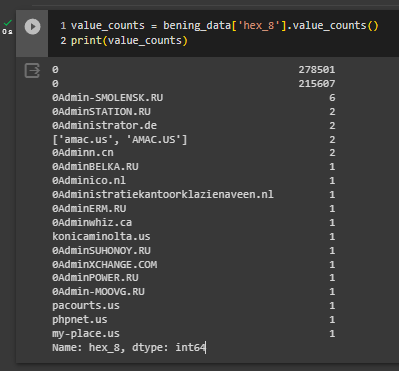

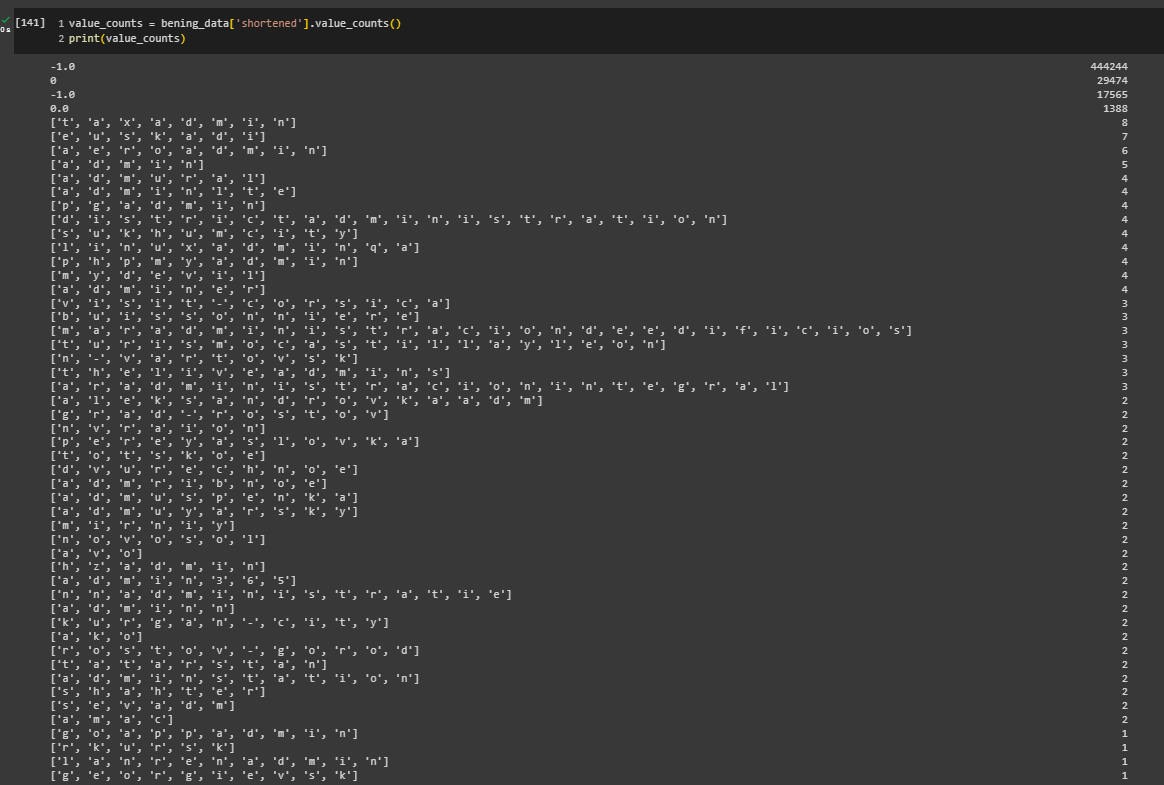

I decided to...

In [27]:
# Lista kolumn do usunięcia
columns_to_remove = [
    'Registrant_Name', 'Organization', 'State', 'Country.1',
    'Emails', 'Registrar', 'Creation_Date_Time', 'Country',
    'ASN', 'IP', 'Domain_Name', 'Page_Rank', 'Name_Server_Count',
    'Domain_Age', 'Alexa_Rank', '1gram', '2gram', '3gram',
    'char_distribution', 'hex_32', 'hex_8', 'subdomain', 'shortened',
    'obfuscate_at_sign', 'dec_32', 'dec_8', 'numeric_percentage',
    'puny_coded', 'oc_8', 'oc_32'
]

# Usuwanie kolumn z bening_data
combined_data = combined_data.drop(columns=columns_to_remove)

In [28]:
# checking the number of missing values
combined_data.isnull().sum()

TTL                0
Domain             0
len              358
longest_word     133
entropy            4
tld                3
typos              0
sld             1329
Label              0
dtype: int64

In [29]:
# Usunięcie wierszy z brakującymi danymi w dowolnej kolumnie
combined_data_without_nan = combined_data.dropna()

In [30]:
# checking the number of missing values
combined_data_without_nan.isnull().sum()

TTL             0
Domain          0
len             0
longest_word    0
entropy         0
tld             0
typos           0
sld             0
Label           0
dtype: int64

In [31]:
combined_data_without_nan.shape

(497429, 9)

In [32]:
combined_data_without_nan.head()

,TTL,Domain,len,longest_word,entropy,tld,typos,sld,Label
0,46,b'google.com.',7,google,1.8348756474779464,com,"[('google.com', 100), ('google.com.br', 95)]",google,0
1,299,b'google.com.',7,google,1.8348756474779464,com,"[('google.com', 100), ('google.com.br', 95)]",google,0
2,38,b'www.google.com.',10,google,2.1142465351822795,com,"[('google.com', 100), ('google.com.br', 95)]",google,0
3,299,b'www.google.com.',10,google,2.1142465351822795,com,"[('google.com', 100), ('google.com.br', 95)]",google,0
4,96,b'facebook.com.',9,facebook,2.5954888901709436,com,"[('facebook.com', 100), ('qq.com', 86)]",facebook,0


In [33]:
combined_data_without_nan.tail()

,TTL,Domain,len,longest_word,entropy,tld,typos,sld,Label
499129,14399,b'naveenmechanical.com.',17,mechanical,2.890279,com,"[('facebook.com', 86), ('twitter.com', 86)]",naveenmechanical,1
499130,3599,b'onlinefrepdfviewer.000webhostapp.com.',32,p,3.808768,com,"[('twitter.com', 86), ('google.com', 86)]",000webhostapp,1
499131,3599,b'onlinefrepdfviewer.000webhostapp.com.',32,p,3.808768,com,"[('twitter.com', 86), ('google.com', 86)]",000webhostapp,1
499132,1799,b'stefanie-bolemant.de.',18,stefanie,3.340769,de,"[('google.de', 86), ('e-recht24.de', 86)]",stefanie-bolemant,1
499133,1799,b'web.asamnet.de.',11,mnet,2.781301,de,"[('gesetze-im-internet.de', 86), ('web.de', 86)]",asamnet,1


zamiana na numeryczne

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

In [35]:
combined_data_numeric = combined_data_without_nan.copy()

In [36]:
# Kolumny do sprawdzenia
columns_to_check = ['TTL', 'Domain', 'len', 'longest_word',
                    'entropy', 'tld', 'typos', 'sld', 'Label'
                   ]

# Inicjalizacja słownika do zliczania wystąpień typów danych
data_type_counts = {}

for column in columns_to_check:
    # Sprawdzenie typów danych w danej kolumnie i zliczenie wystąpień
    data_types = combined_data_numeric[column].apply(type).value_counts()
    data_type_counts[column] = data_types

# Wyświetlenie wyników
for column, data_types in data_type_counts.items():
    print(f"Kolumna: {column}")
    print(data_types)
    print()

Kolumna: TTL
<class 'int'>    492430
<class 'str'>      4999
Name: TTL, dtype: int64

Kolumna: Domain
<class 'str'>    497429
Name: Domain, dtype: int64

Kolumna: len
<class 'str'>    492430
<class 'int'>      4999
Name: len, dtype: int64

Kolumna: longest_word
<class 'str'>    497429
Name: longest_word, dtype: int64

Kolumna: entropy
<class 'str'>      473469
<class 'float'>     23960
Name: entropy, dtype: int64

Kolumna: tld
<class 'str'>    497429
Name: tld, dtype: int64

Kolumna: typos
<class 'str'>    497429
Name: typos, dtype: int64

Kolumna: sld
<class 'str'>    497429
Name: sld, dtype: int64

Kolumna: Label
<class 'int'>    497429
Name: Label, dtype: int64



In [37]:
# convert the value in the 'TTL', 'len' and 'entropy' columns to floats or NaN if the value is invalid

combined_data_numeric['TTL'] = pd.to_numeric(combined_data_numeric['TTL'], errors='coerce')
combined_data_numeric['len'] = pd.to_numeric(combined_data_numeric['len'], errors='coerce')
combined_data_numeric['entropy'] = pd.to_numeric(combined_data_numeric['entropy'], errors='coerce')

In [38]:
# LabelEncoder initialization
label_encoder = LabelEncoder()

In [39]:
# convert the values in the 'Domain', 'longest_word', 'tld', and 'sld' columns to the numeric values

combined_data_numeric['Domain'] = label_encoder.fit_transform(combined_data_without_nan['Domain'])
combined_data_numeric['longest_word'] = label_encoder.fit_transform(combined_data_without_nan['longest_word'])
combined_data_numeric['tld'] = label_encoder.fit_transform(combined_data_without_nan['tld'])
combined_data_numeric['sld'] = label_encoder.fit_transform(combined_data_without_nan['sld'])

In [40]:
# convert the values in the 'typos' column to the numeric values by extracting data into 4 new columns

# function to extract data from the 'typos' column
def extract_typos_info(typos_str, position):
    try:
        # remove '[' and ']' characters and divide after commas
        typos_list = typos_str.strip('[]').split(', ')
        # select an item from the list and remove any "'" or """ characters.
        info = typos_list[position].strip('\'"')
        # remove special characters such as ')'
        info = info.rstrip(')')

        return info
    except (IndexError, AttributeError, ValueError):
        return -1  # returns -1 if data is not available

# create new columns based on the 'typos' column
combined_data_numeric['domain1'] = combined_data_numeric['typos'].apply(lambda x: extract_typos_info(x, 0))
combined_data_numeric['percentage1'] = combined_data_numeric['typos'].apply(lambda x: extract_typos_info(x, 1))
combined_data_numeric['domain2'] = combined_data_numeric['typos'].apply(lambda x: extract_typos_info(x, 2))
combined_data_numeric['percentage2'] = combined_data_numeric['typos'].apply(lambda x: extract_typos_info(x, 3))

# if the data in the 'domain1' and 'domain2' columns contain parentheses and quotation marks, remove them
combined_data_numeric['domain1'] = combined_data_numeric['domain1'].apply(lambda x: x.lstrip('(\'"') if isinstance(x, str) else x)
combined_data_numeric['domain2'] = combined_data_numeric['domain2'].apply(lambda x: x.lstrip('(\'"') if isinstance(x, str) else x)

# convert 'percentage1' and 'percentage2' columns to numeric values
combined_data_numeric['percentage1'] = combined_data_numeric['percentage1'].astype(float)
combined_data_numeric['percentage2'] = combined_data_numeric['percentage2'].astype(float)

# delete 'typos' column
combined_data_numeric.drop('typos', axis=1, inplace=True)

# display initial rows with new columns
print(combined_data_numeric[['domain1', 'percentage1', 'domain2', 'percentage2']].head(10))

        domain1  percentage1        domain2  percentage2
0    google.com        100.0  google.com.br         95.0
1    google.com        100.0  google.com.br         95.0
2    google.com        100.0  google.com.br         95.0
3    google.com        100.0  google.com.br         95.0
4  facebook.com        100.0         qq.com         86.0
5  facebook.com        100.0         qq.com         86.0
6  facebook.com        100.0         qq.com         86.0
7  facebook.com        100.0         qq.com         86.0
8  facebook.com        100.0         qq.com         86.0
9  facebook.com        100.0         qq.com         86.0


In [41]:
# convert the values in the new columns to the numeric values

domains = combined_data_numeric['domain1'].tolist() + combined_data_numeric['domain2'].tolist()
label_encoder.fit(domains)

# replace strings with numeric values in 'domain1' and 'domain2' columns
combined_data_numeric['domain1'] = label_encoder.transform(combined_data_numeric['domain1'])
combined_data_numeric['domain2'] = label_encoder.transform(combined_data_numeric['domain2'])

# display initial rows with new columns
print(combined_data_numeric[['domain1', 'percentage1', 'domain2', 'percentage2']].head(10))

   domain1  percentage1  domain2  percentage2
0      194        100.0      196         95.0
1      194        100.0      196         95.0
2      194        100.0      196         95.0
3      194        100.0      196         95.0
4      154        100.0      345         86.0
5      154        100.0      345         86.0
6      154        100.0      345         86.0
7      154        100.0      345         86.0
8      154        100.0      345         86.0
9      154        100.0      345         86.0


In [42]:
# delete all rows containing NaN fields
combined_data_numeric = combined_data_numeric.dropna()

In [43]:
# convert data type to float
combined_data_numeric = combined_data_numeric.astype(float)

In [44]:
# check if the operations worked

columns_to_check = ['TTL', 'Domain', 'len', 'longest_word',
                    'entropy', 'tld', 'sld', 'Label', 'domain1',
                    'percentage1', 'domain2', 'percentage2'
                    ]

data_type_counts = {}

for column in columns_to_check:
    data_types = combined_data_numeric[column].apply(type).value_counts()
    data_type_counts[column] = data_types

for column, data_types in data_type_counts.items():
    print(f"Kolumna: {column}")
    print(data_types)
    print()

Kolumna: TTL
<class 'float'>    466736
Name: TTL, dtype: int64

Kolumna: Domain
<class 'float'>    466736
Name: Domain, dtype: int64

Kolumna: len
<class 'float'>    466736
Name: len, dtype: int64

Kolumna: longest_word
<class 'float'>    466736
Name: longest_word, dtype: int64

Kolumna: entropy
<class 'float'>    466736
Name: entropy, dtype: int64

Kolumna: tld
<class 'float'>    466736
Name: tld, dtype: int64

Kolumna: sld
<class 'float'>    466736
Name: sld, dtype: int64

Kolumna: Label
<class 'float'>    466736
Name: Label, dtype: int64

Kolumna: domain1
<class 'float'>    466736
Name: domain1, dtype: int64

Kolumna: percentage1
<class 'float'>    466736
Name: percentage1, dtype: int64

Kolumna: domain2
<class 'float'>    466736
Name: domain2, dtype: int64

Kolumna: percentage2
<class 'float'>    466736
Name: percentage2, dtype: int64



In [46]:
combined_data_numeric.head(10)

,TTL,Domain,len,longest_word,entropy,tld,sld,Label,domain1,percentage1,domain2,percentage2
0,46.0,86333.0,7.0,12400.0,1.834876,30711.0,64612.0,0.0,194.0,100.0,196.0,95.0
1,299.0,86333.0,7.0,12400.0,1.834876,30711.0,64612.0,0.0,194.0,100.0,196.0,95.0
2,38.0,257006.0,10.0,12400.0,2.114247,30711.0,64612.0,0.0,194.0,100.0,196.0,95.0
3,299.0,257006.0,10.0,12400.0,2.114247,30711.0,64612.0,0.0,194.0,100.0,196.0,95.0
4,96.0,71808.0,9.0,10240.0,2.595489,30711.0,53676.0,0.0,154.0,100.0,345.0,86.0
5,264.0,71808.0,9.0,10240.0,2.595489,30711.0,53676.0,0.0,154.0,100.0,345.0,86.0
6,299.0,71808.0,9.0,10240.0,2.595489,30711.0,53676.0,0.0,154.0,100.0,345.0,86.0
7,299.0,71808.0,9.0,10240.0,2.595489,30711.0,53676.0,0.0,154.0,100.0,345.0,86.0
8,3218.0,252272.0,12.0,10240.0,2.723308,30711.0,53676.0,0.0,154.0,100.0,345.0,86.0
9,3323.0,252272.0,12.0,10240.0,2.723308,30711.0,53676.0,0.0,154.0,100.0,345.0,86.0


In [47]:
combined_data_numeric.tail(10)

,TTL,Domain,len,longest_word,entropy,tld,sld,Label,domain1,percentage1,domain2,percentage2
499124,1799.0,71806.0,65.0,18029.0,3.988825,30711.0,119285.0,1.0,345.0,86.0,453.0,86.0
499125,3599.0,85078.0,10.0,12253.0,2.314247,31236.0,63744.0,1.0,455.0,86.0,311.0,86.0
499126,3598.0,85078.0,10.0,12253.0,2.314247,31236.0,63744.0,1.0,455.0,86.0,311.0,86.0
499127,3599.0,256581.0,13.0,12253.0,2.530423,31236.0,63744.0,1.0,455.0,86.0,311.0,86.0
499128,3599.0,110293.0,22.0,22312.0,3.642649,30711.0,48.0,1.0,424.0,86.0,194.0,86.0
499129,14399.0,143275.0,17.0,19090.0,2.890279,30711.0,107247.0,1.0,154.0,86.0,424.0,86.0
499130,3599.0,153303.0,32.0,22312.0,3.808768,30711.0,48.0,1.0,424.0,86.0,194.0,86.0
499131,3599.0,153303.0,32.0,22312.0,3.808768,30711.0,48.0,1.0,424.0,86.0,194.0,86.0
499132,1799.0,193872.0,18.0,28977.0,3.340769,30808.0,145241.0,1.0,197.0,86.0,133.0,86.0
499133,1799.0,223083.0,11.0,19787.0,2.781301,30808.0,12830.0,1.0,175.0,86.0,460.0,86.0


In [48]:
# divide the data into a training set (80%) and a test set (20%)

X = combined_data_numeric.drop('Label', axis=1)
y = combined_data_numeric['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [49]:
# initialization and training of the RandomForestClassifier model
model = RandomForestClassifier(n_estimators=100, random_state=2)

# training the model on training data
model.fit(X_train, y_train)

RandomForestClassifier(random_state=2)

In [50]:
# Prognozowanie na zestawie testowym
y_pred = model.predict(X_test)

# Obliczenie dokładności modelu
accuracy = accuracy_score(y_test, y_pred)
print("Dokładność modelu:", accuracy)

# Wyświetlenie raportu klasyfikacji i macierzy pomyłek
print(classification_report(y_test, y_pred))
print("Macierz pomyłek:")
print(confusion_matrix(y_test, y_pred))

Dokładność modelu: 0.9922655011355358
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     92366
         1.0       0.86      0.32      0.46       982

    accuracy                           0.99     93348
   macro avg       0.93      0.66      0.73     93348
weighted avg       0.99      0.99      0.99     93348

Macierz pomyłek:
[[92316    50]
 [  672   310]]


[0.07568478 0.21354872 0.06006932 0.17989256 0.10665226 0.03216367
 0.22159306 0.03646185 0.01819888 0.04184045 0.01389446]


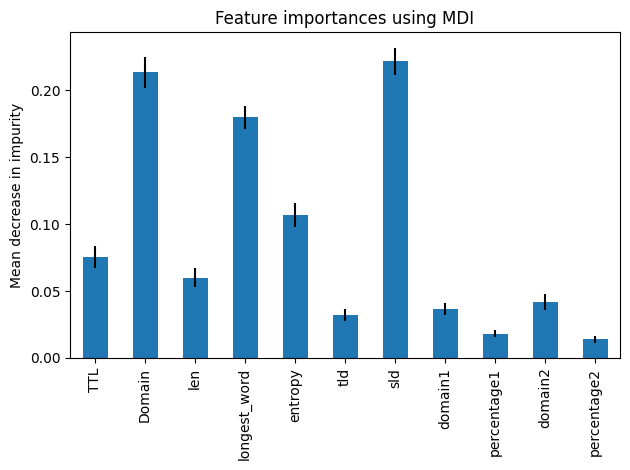

In [51]:
# Dodaj potrzebne importy
import numpy as np
import matplotlib.pyplot as plt

# Oblicz ważność cech
importances = model.feature_importances_
print(importances)
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

# Utwórz obiekt pandas Series z ważnościami cech
feature_names = [
    'TTL', 'Domain', 'len', 'longest_word', 'entropy', 'tld', 'sld', 'domain1', 'percentage1', 'domain2', 'percentage2'
]
forest_importances = pd.Series(importances, index=feature_names)

# Wyświetl wykres ważności cech
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

plt.show()

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Tworzenie modelu
model = RandomForestClassifier()

# Walidacja krzyżowa z 5 podziałami
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Wyświetlenie wyników walidacji krzyżowej
print("Dokładność walidacji krzyżowej: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std() * 2))

Dokładność walidacji krzyżowej: 0.99 (+/- 0.00)


drzewo nierandomowe

model xgboost
adaboost